<a href="https://colab.research.google.com/github/Nuelsville/Data-Visualization/blob/main/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

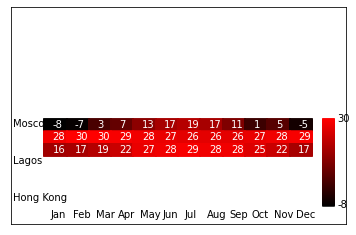

In [19]:
# Heat map optimised for PyCharm in full-screen mode

import numpy as np
import matplotlib.pyplot as plt

# plt.figure(figsize=(40, 8))

# This subroutine encapsulates the 'plot' method, as the most suitable for raster rendering
def DrawBox(x, y, size, r, g, b):
    for i in range(0, int(size)):
        if r < 0:
            r = int(0)
        if r > 255:
            r = int(255)
        if g < 0:
            g = int(0)
        if g > 255:
            g = int(255)
        if b < 0:
            b = int(0)
        if b > 255:
            b = int(255)
        plt.plot([x, x + size], [y + i, y + i], '#{:02x}{:02x}{:02x}'.format(r, g, b))


# Initialise NumPy arrays containing the average monthly temperatures for 7 cities
City1 = np.array([-8, -7, 3, 7, 13, 17, 19, 17, 11, 1, 5, -5], dtype=int)
City2 = np.array([28, 30, 30, 29, 28, 27, 26, 26, 26, 27, 28, 29], dtype=int)
City3 = np.array([16, 17, 19, 22, 27, 28, 29, 28, 28, 25, 22, 17], dtype=int)

# Initialise a two-dimensional NumPy array containing the average monthly temperatures
Cities = np.array([City1, City2, City3], dtype=int)

# Extract the minimum and the maximum values
Min = np.min(Cities)
Max = np.max(Cities)

# Setup the plotting area
plt.axis([0, 600, 0, 700])
plt.xticks([])
plt.yticks([])

# Initialise box size and offsets
BoxSize = int(40)
OffsetX = int(15)
OffsetY = int(12)

# Visualise the heat map
for i in range(0, Cities.shape[0]):
    for j in range(0, Cities.shape[1]):
        ColourCode = int(((Cities[i, j]-Min)/(Max-Min))*255)
        DrawBox(60+BoxSize*j, 300-BoxSize*i, BoxSize, ColourCode, 0, 0)
        plt.text(OffsetX+60+BoxSize*j, OffsetY+300-BoxSize*i, str(Cities[i, j]), color='white')

# Visualise the colour scale
for i in range(0, 280):
    plt.plot([560, 580], [i + 60, i + 60], '#{:02x}{:02x}{:02x}'.format(int((i / 280) * 255), 0, 0))
plt.text(585, 55, str(Min))
plt.text(585, 332, str(Max))

# Print the names of the months and the cities
plt.text(72, 20, 'Jan')
plt.text(112, 20, 'Feb')
plt.text(152, 20, 'Mar')
plt.text(192, 20, 'Apr')
plt.text(232, 20, 'May')
plt.text(272, 20, 'Jun')
plt.text(312, 20, 'Jul')
plt.text(352, 20, 'Aug')
plt.text(392, 20, 'Sep')
plt.text(432, 20, 'Oct')
plt.text(472, 20, 'Nov')
plt.text(512, 20, 'Dec')

plt.text(5, 315, 'Moscow')
plt.text(5, 195, 'Lagos')
plt.text(5, 75, 'Hong Kong')

plt.show()



   Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec       City
0   -8   -7   -3    7   13   17   19   17   11    5   -1   -5     Moscow
1   28   30   30   29   28   27   26   26   26   27   28   29      Lagos
2   16   17   19   22   26   28   29   28   28   25   22   17  Hong Kong
Number of Rows:  3
Number of Columns:  13
#0A7D3F


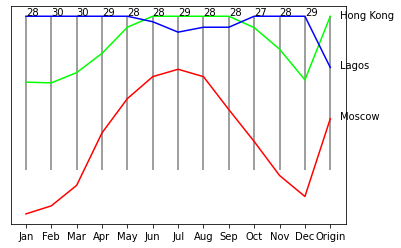

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Store the CSV file into a data frame
df = pd.read_csv('https://raw.githubusercontent.com/Nuelsville/information-visualization-task/main/convertcsv.csv')

# Print the dataset on the screen
D = df.to_string()
print(D)

# Print the dimensions of the dataset
print('Number of Rows: ', df.shape[0])
print('Number of Columns: ', df.shape[1])

# Save the dataset as NumPy array
MyArray = df.to_numpy()

# Change textual data to numerical
for i in range(0, MyArray.shape[0]):
    for j in range(0, MyArray.shape[1]):
        if MyArray[i, j] == 'Moscow':
            MyArray[i, j] = int(1)
        if MyArray[i, j] == 'Lagos':
            MyArray[i, j] = int(2)
        if MyArray[i, j] == 'Hong Kong':
            MyArray[i, j] = int(3)

# Declare new array of type float
MyData = np.empty(shape=(MyArray.shape[0], MyArray.shape[1]), dtype=float)

# Assign new values to array
for i in range(0, MyData.shape[0]):
    for j in range(0, MyData.shape[1]):
        MyData[i, j] = float(MyArray[i, j])


# Find the maximum values per column
Maximum = np.amax(MyData, axis=0)

# Normalise to interval 0 .. 100
for i in range(0, MyData.shape[0]):
    for j in range(0, MyData.shape[1]):
        MyData[i, j] = float(MyData[i, j]*(100.0/Maximum[j]))

# Spine names
name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Origin']

# Test for random RGB in hex
k = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']
MyC = '#'
for i in range(0, 6):
    s = np.random.choice(k)
    MyC = MyC + s
print(MyC)

# Spines
for i in range(0, MyData.shape[1]):
    plt.vlines(i, 0, 100, '#808080')

# Vehicles from Moscow
for i in range(0, MyData.shape[0]):
    if MyData[i, 11] < float(40.0):
        MyC = '#'
        for j in range(0, 6):
            s1 = np.random.choice(k)
            s2 = np.random.choice(k)
            MyC = '#' + s1 + s2 + '0000'
        plt.plot(name, MyData[i], '#FF0000')

# Vehicles from Lagos
for i in range(0, MyData.shape[0]):
    if 40. < MyData[i, 11] < 80.0:
        MyC = '#'
        for j in range(0, 6):
            s1 = np.random.choice(k)
            s2 = np.random.choice(k)
            MyC = '#' + '00' + s1 + s2 + '00'
        plt.plot(name, MyData[i], '#00FF00')

# Vehicles from Hong Kong
for i in range(0, MyData.shape[0]):
    if 90.0 < MyData[i, 11]:
        MyC = '#'
        for j in range(0, 6):
            s1 = np.random.choice(k)
            s2 = np.random.choice(k)
            MyC = '#' + '0000' + s1 + s2
        plt.plot(name, MyData[i], '#0000FF')

plt.text(0, 101, round(Maximum[0]))
plt.text(1, 101, round(Maximum[1]))
plt.text(2, 101, round(Maximum[2]))
plt.text(3, 101, round(Maximum[3]))
plt.text(4, 101, round(Maximum[4]))
plt.text(5, 101, round(Maximum[5]))
plt.text(6, 101, round(Maximum[6]))
plt.text(7, 101, round(Maximum[7]))
plt.text(8, 101, round(Maximum[8]))
plt.text(9, 101, round(Maximum[9]))
plt.text(10, 101, round(Maximum[10]))
plt.text(11, 101, round(Maximum[11]))
plt.text(12.4, 33, 'Moscow')
plt.text(12.4, 66, 'Lagos')
plt.text(12.4, 99, 'Hong Kong')

plt.yticks([])

plt.show()

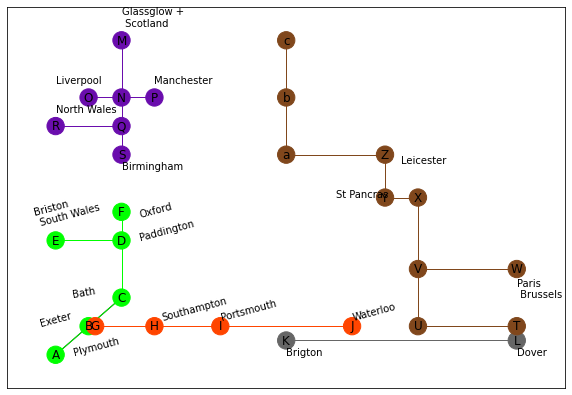

In [2]:
# This program is optimised for the PyCharm environment

import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
MyGraph = nx.Graph()

# Add nodes
# Green Line
MyGraph.add_node('A', npos=(10, 10), ccn='#00FF00')
MyGraph.add_node('B', npos=(20, 20), ccn='#00FF00')
MyGraph.add_node('C', npos=(30, 30), ccn='#00FF00')
MyGraph.add_node('D', npos=(30, 50), ccn='#00FF00')
MyGraph.add_node('E', npos=(10, 50), ccn='#00FF00')
MyGraph.add_node('F', npos=(30, 60), ccn='#00FF00')
# Orange Line
MyGraph.add_node('G', npos=(22, 20), ccn='#FF4500')
MyGraph.add_node('H', npos=(40, 20), ccn='#FF4500')
MyGraph.add_node('I', npos=(60, 20), ccn='#FF4500')
MyGraph.add_node('J', npos=(100, 20), ccn='#FF4500')
# Black Line
MyGraph.add_node('K', npos=(80, 15), ccn='#666666')
MyGraph.add_node('L', npos=(150, 15), ccn='#666666')
# Purple Line
MyGraph.add_node('M', npos=(30, 120), ccn='#6A0DAD')
MyGraph.add_node('N', npos=(30, 100), ccn='#6A0DAD')
MyGraph.add_node('O', npos=(20, 100), ccn='#6A0DAD')
MyGraph.add_node('P', npos=(40, 100), ccn='#6A0DAD')
MyGraph.add_node('Q', npos=(30, 90), ccn='#6A0DAD')
MyGraph.add_node('R', npos=(10, 90), ccn='#6A0DAD')
MyGraph.add_node('S', npos=(30, 80), ccn='#6A0DAD')
# Brown Line
MyGraph.add_node('T', npos=(150, 20), ccn='#80471C')
MyGraph.add_node('U', npos=(120, 20), ccn='#80471C')
MyGraph.add_node('V', npos=(120, 40), ccn='#80471C')
MyGraph.add_node('W', npos=(150, 40), ccn='#80471C')
MyGraph.add_node('X', npos=(120, 65), ccn='#80471C')
MyGraph.add_node('Y', npos=(110, 65), ccn='#80471C')
MyGraph.add_node('Z', npos=(110, 80), ccn='#80471C')
MyGraph.add_node('a', npos=(80, 80), ccn='#80471C')
MyGraph.add_node('b', npos=(80, 100), ccn='#80471C')
MyGraph.add_node('c', npos=(80, 120), ccn='#80471C')


# Connect nodes
# Green Line
MyGraph.add_edge('A', 'B', cce='#00FF00')
MyGraph.add_edge('B', 'C', cce='#00FF00')
MyGraph.add_edge('C', 'D', cce='#00FF00')
MyGraph.add_edge('D', 'E', cce='#00FF00')
MyGraph.add_edge('D', 'F', cce='#00FF00')
# Orange Line
MyGraph.add_edge('G', 'H', cce='#FF4500')
MyGraph.add_edge('H', 'I', cce='#FF4500')
MyGraph.add_edge('I', 'J', cce='#FF4500')
# Blue Line
MyGraph.add_edge('K', 'L', cce='#666666')
# Purple Line
MyGraph.add_edge('M', 'N', cce='#6A0DAD')
MyGraph.add_edge('N', 'O', cce='#6A0DAD')
MyGraph.add_edge('N', 'P', cce='#6A0DAD')
MyGraph.add_edge('N', 'Q', cce='#6A0DAD')
MyGraph.add_edge('Q', 'R', cce='#6A0DAD')
MyGraph.add_edge('Q', 'S', cce='#6A0DAD')
# Brown Line
MyGraph.add_edge('T', 'U', cce='#80471C')
MyGraph.add_edge('U', 'V', cce='#80471C')
MyGraph.add_edge('V', 'W', cce='#80471C')
MyGraph.add_edge('V', 'X', cce='#80471C')
MyGraph.add_edge('X', 'Y', cce='#80471C')
MyGraph.add_edge('Y', 'Z', cce='#80471C')
MyGraph.add_edge('Z', 'a', cce='#80471C')
MyGraph.add_edge('a', 'b', cce='#80471C')
MyGraph.add_edge('b', 'c', cce='#80471C')



# Extract attributes from the graph to dictionaries
pos = nx.get_node_attributes(MyGraph, 'npos')
nodecolour = nx.get_node_attributes(MyGraph, 'ccn')
edgecolour = nx.get_edge_attributes(MyGraph, 'cce')

# Place the dictionary values in lists
NodeList = list(nodecolour.values())
EdgeList = list(edgecolour.values())

# Set the size of the figure
plt.figure(figsize=(10, 7))

# Display the names of the stations
# Green Line
plt.text(15, 10, s='Plymouth', rotation=15)
plt.text(5, 20, s='Exeter', rotation=15)
plt.text(15, 30, s='Bath', rotation=10)
plt.text(35, 50, s='Paddington', rotation=15)
plt.text(3, 55, s='Briston \n South Wales', rotation=15)
plt.text(35, 58, s='Oxford', rotation=15)

# Orange Line
plt.text(42, 22, s='Southampton', rotation=15)
plt.text(60, 22, s='Portsmouth', rotation=15)
plt.text(100, 22, s='Waterloo', rotation=15)

# Black Line
plt.text(80, 10, s='Brigton', rotation=0)
plt.text(150, 10, s='Dover', rotation=0)

# Purple Line
plt.text(30, 125, s='Glassglow + \n Scotland', rotation=0)
plt.text(10, 105, s='Liverpool', rotation=0)
plt.text(40, 105, s='Manchester', rotation=0)
plt.text(10, 95, s='North Wales', rotation=0)
plt.text(30, 75, s='Birmingham', rotation=0)

#Brown Line
plt.text(150, 30, s='Paris \n Brussels', rotation=0)
plt.text(95, 65, s='St Pancras', rotation=0)
plt.text(115, 77, s='Leicester', rotation=0)
plt.text(85, 80, s='Leicester', rotation=15)
plt.text(85, 80, s='Leicester', rotation=15)

# Draw the nodes and the edges
nx.draw_networkx(MyGraph, pos, node_color=NodeList)
nx.draw_networkx_edges(MyGraph, pos, edge_color=EdgeList)

# Visualise the graph
plt.show()